In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])  
    
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

In [86]:
tsep = np.genfromtxt('times_separable.txt')
tent = np.genfromtxt('times_NOT_separable.txt')

(len(tsep)/ 10**6)

0.25

In [89]:
space = 50000
Ns = tsep[:,1]
ts = tsep[:,2]

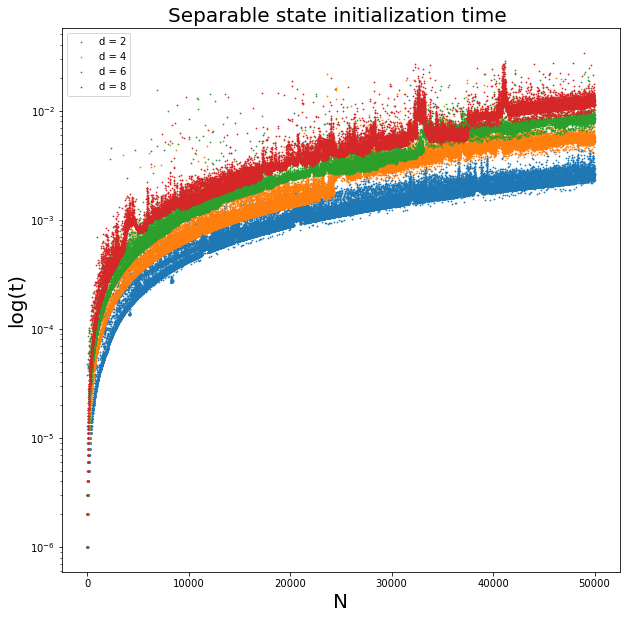

In [100]:
#separable: from onefile.f90, commented out, 1 to 221464
figu, axu =  plt.subplots(figsize = (10,10))

dims = range(2,10,2)
c = 0
for d in dims:
    axu.plot(Ns[c*space : (c+1)*space], ts[c*space : (c+1)*space], '.', label = 'd = ' +  str(d), markersize = 1.5)   
    c += 1

axu.set_yscale('log')
#axu.set_xscale('log')
axu.legend()
axu.set_ylabel('log(t)')
axu.set_xlabel('N')
axu.set_title('Separable state initialization time ')

plt.savefig('separable')

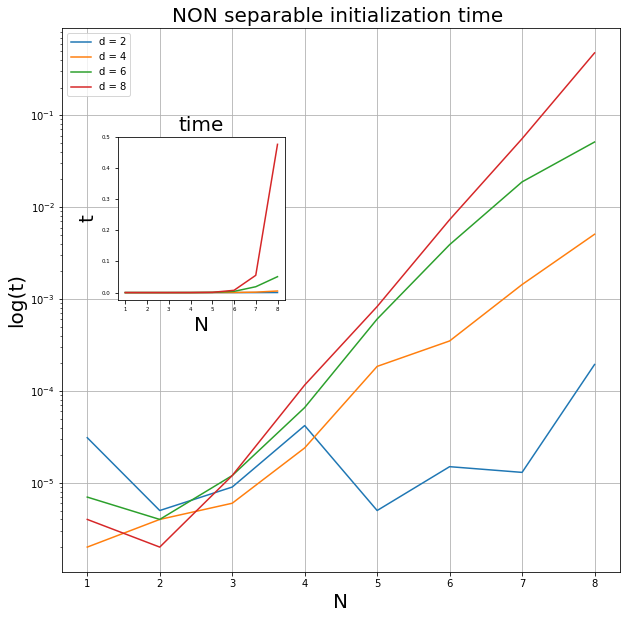

In [103]:
# select 2nd and 3rd column
fig, ax = plt.subplots(figsize = (10,10))

#https://stackoverflow.com/questions/17458580/embedding-small-plots-inside-subplots-in-matplotlib
#where to put additional plot
rect = [0.1,0.5,0.3,0.3]
ax1 = add_subplot_axes(ax,rect)

N = tent[:, 1]
t = tent[:, 2]
# 8 values for each d 
dims = range(2,10,2)
c = 0
for d in dims:
    ax.plot(N[c*8 : (c+1)*8], t[c*8 : (c+1)*8], label = 'd = ' +  str(d))
    ax1.plot(N[c*8 : (c+1)*8], t[c*8 : (c+1)*8])
    c += 1
    
ax.legend()
ax.set_yscale('log')
ax.set_ylabel('log(t)')
ax.set_xlabel('N')
ax.set_title('NON separable initialization time ')
ax1.set_title('time')
ax1.set_ylabel('t')
ax1.set_xlabel('N')

ax.grid(True)

plt.savefig('non separable init time')